In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 1. Data Cleaning

In [2]:
warnings.filterwarnings('ignore')
df=pd.read_csv("train.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
df.describe(include="object")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [8]:
df.shape

(100000, 28)

In [9]:
(df.isnull().sum()/len(df))*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [10]:
str_to_int=['Age','Num_of_Loan']
str_to_float=['Annual_Income','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [11]:
for i in str_to_int:
    df[i]=df[i].str.replace('_','')
    df[df[i]=='']=np.nan
    df[i]=df[i].astype(int)

In [12]:
for j in str_to_float:
    df[j]=df[j].str.replace('_','')
    df[df[j]=='']=np.nan
    df[j]=df[j].astype(float)

In [13]:
df.dropna(how='all',inplace=True)

In [14]:
dropped=['ID','Customer_ID','Month','Name','Type_of_Loan','SSN']
df.drop(columns=dropped,axis=1,inplace=True)
df.shape

(97909, 22)

In [15]:
columns_c=df.select_dtypes(include='object').columns.tolist()
columns_n=df.drop(columns=columns_c,axis=1).columns.tolist()

In [16]:
for i in columns_c:
    df[i]=df[i].str.replace('_______','')
    df[i]=df[i].str.replace('!@9#%8','')
    df[i]=df[i].str.replace('_','')   

In [17]:
df.shape

(97909, 22)

## 2. Outliers Detection

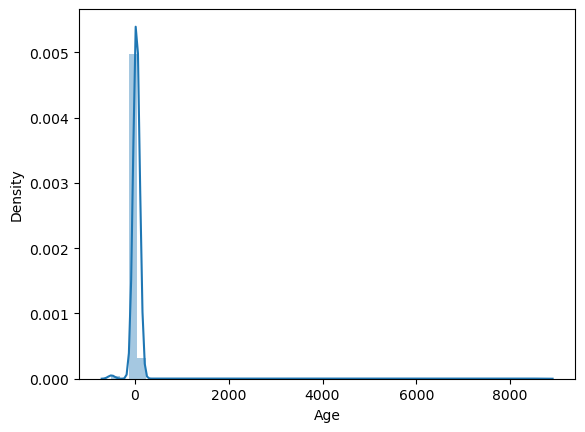

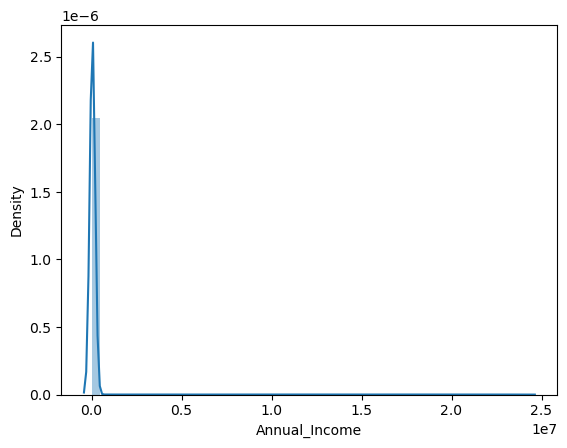

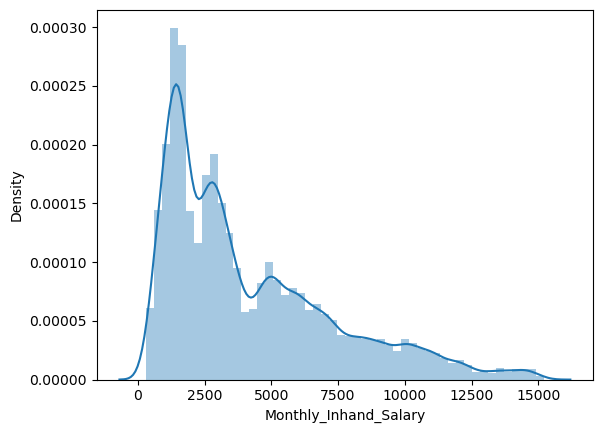

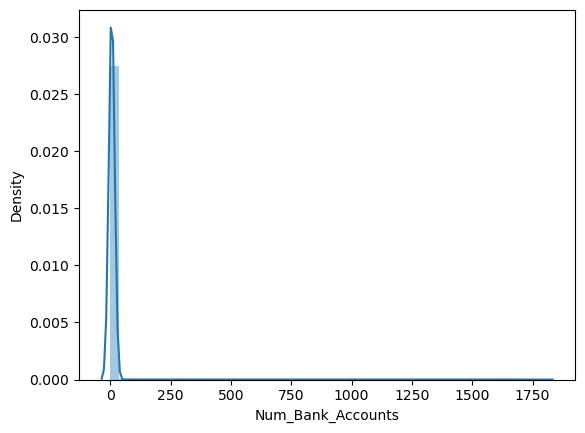

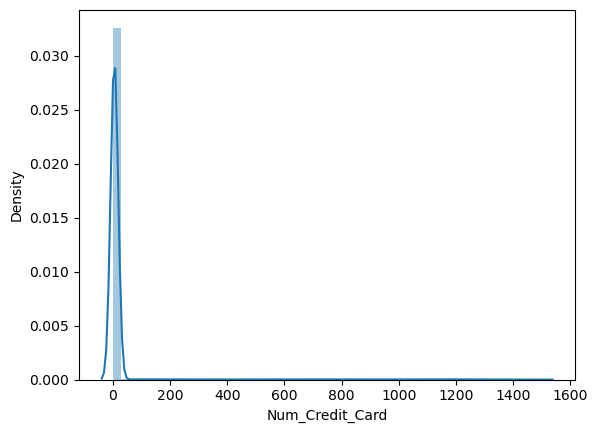

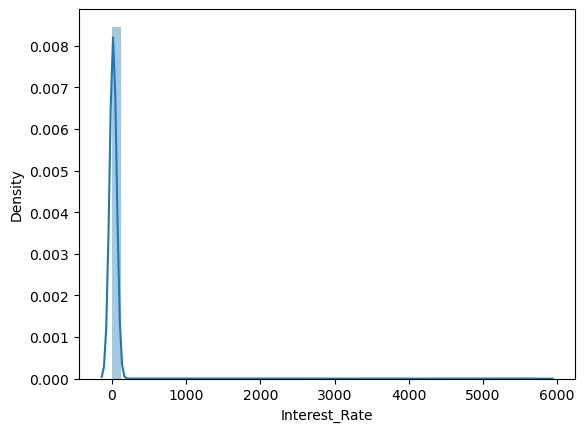

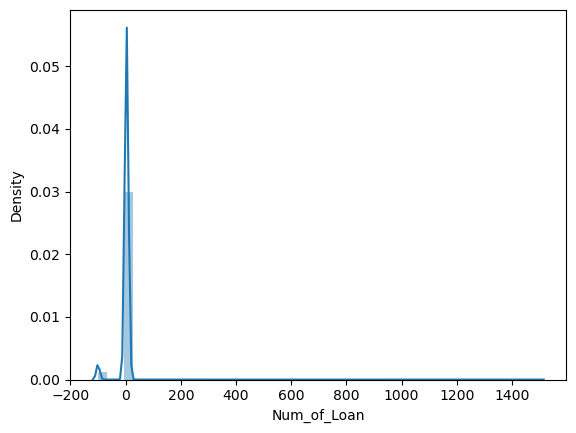

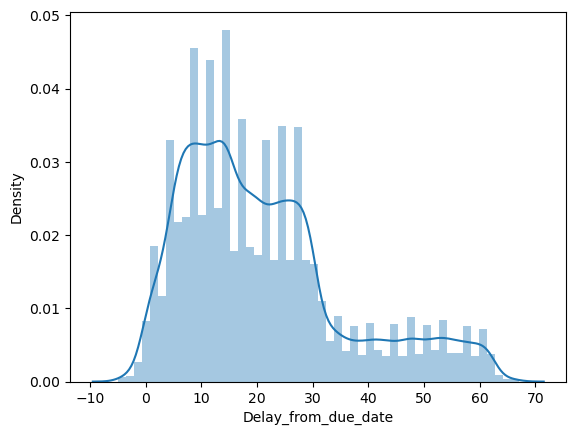

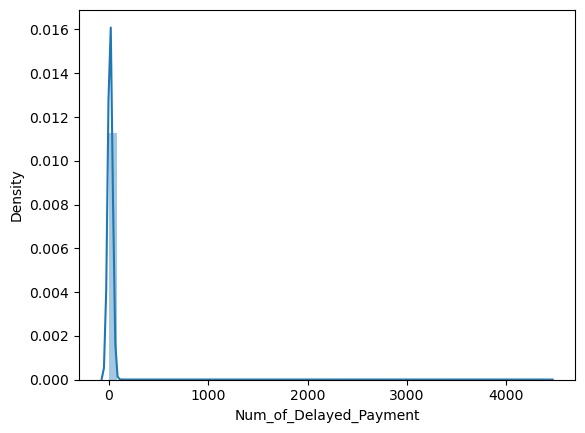

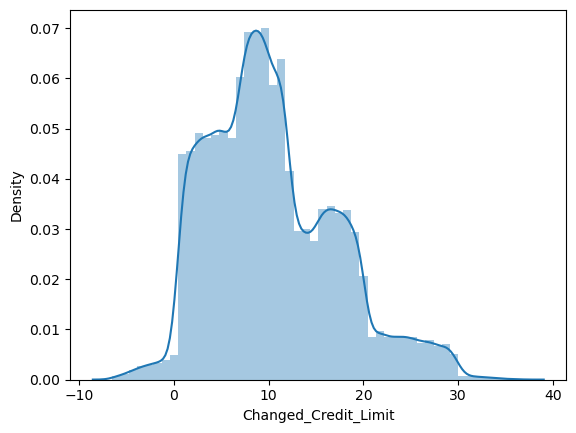

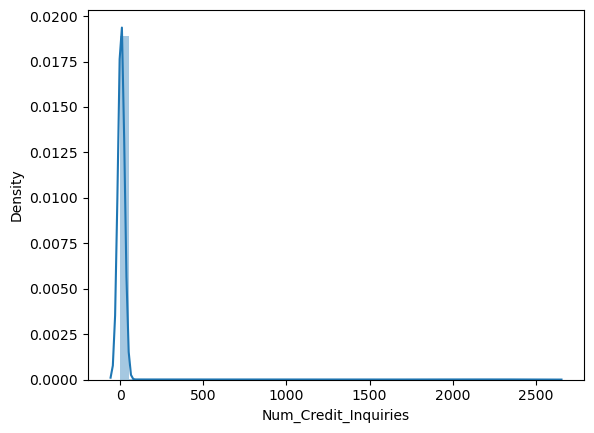

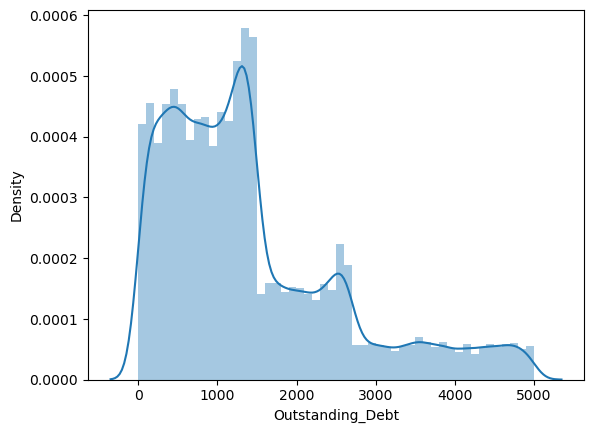

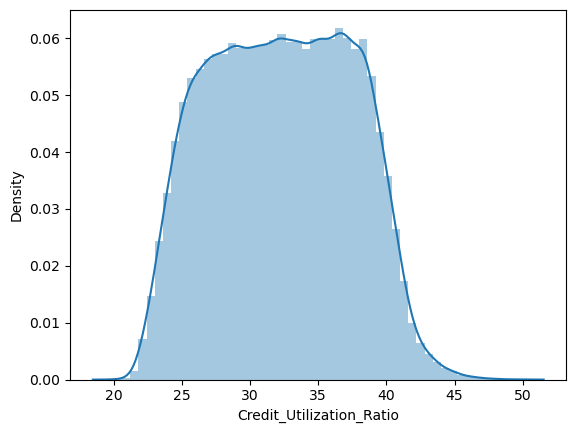

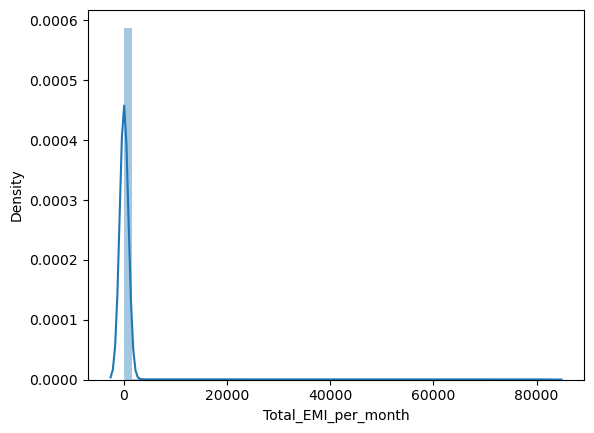

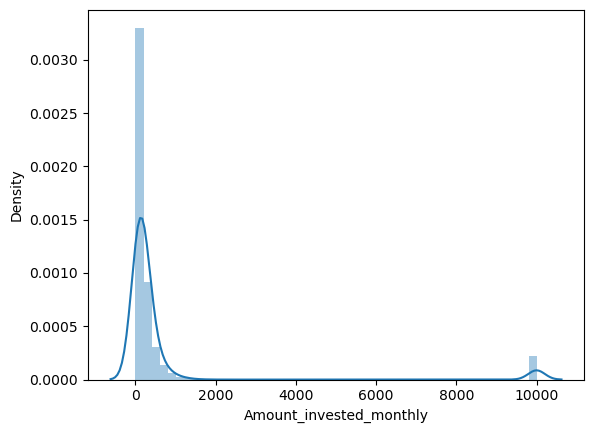

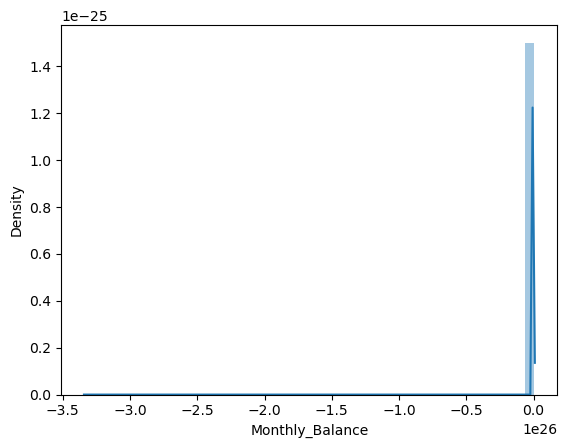

In [18]:
for i in columns_n:
    sns.distplot(df[i])
    plt.show()

In [19]:
df.drop(df[df['Monthly_Balance']<-100].index,inplace=True)

In [20]:
df.drop(df[(df['Age']>100)].index,inplace=True)

#### Clearly there some extreme values and some outliers and we will try to remove only the outliers.
1. One person can not have so many Bank accounts and credit cards.
2. The Interest_Rate seems very much higher than usual.
3. Number_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment and Num_Credit_Inquiries can not be negative.
4. Some accounts have highly negative Monthly_Balance.

In [21]:
for i in columns_n[0:15]:
    df.drop(df[(df[i]<0.0)].index,inplace=True)

In [22]:
df.shape

(88902, 22)

In [23]:
for i in ['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries']:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df.drop(df[(df[i]>Q3+1.5*IQR)|(df[i]<Q1-1.5*IQR)].index,inplace=True)

In [24]:
df.shape

(81571, 22)

## 3. Missing Values

In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(),inplace=True)

In [27]:
for i in columns_c:
    df[i].replace('',np.nan,inplace=True)
    df[i].fillna(df[i].mode()[0],inplace=True)

In [28]:
df['Credit_History_Age_Years']=df['Credit_History_Age'].str.extract(r'(\d+)\s*Years').astype(int)
df.drop(columns=['Credit_History_Age'],inplace=True)
columns_c.remove('Credit_History_Age')

In [29]:
df_num=df[columns_n]
df_obj=df[columns_c]

In [30]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_knn=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [31]:
df1=pd.concat([df_knn,df_obj],axis=1)

In [32]:
df1.shape

(81571, 21)

## 4. Visualization

In [33]:
corr=df_knn.corr()
corr

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.006483,0.080592,-0.187605,-0.146971,-0.214877,-0.211240,-0.170735,-0.180131,-0.156599,-0.249466,-0.200775,0.023819,0.000106,0.002660,0.115542
Annual_Income,0.006483,1.000000,0.029175,-0.008733,-0.002756,-0.007924,-0.004574,-0.011650,-0.006933,-0.000011,-0.008268,-0.004395,0.012038,-0.003253,-0.005432,0.019298
Monthly_Inhand_Salary,0.080592,0.029175,1.000000,-0.253575,-0.196901,-0.274643,-0.233008,-0.225987,-0.258128,-0.158679,-0.255791,-0.247401,0.155221,0.006879,0.058866,0.628928
Num_Bank_Accounts,-0.187605,-0.008733,-0.253575,1.000000,0.440964,0.579162,0.470475,0.553278,0.592127,0.332121,0.516088,0.505449,-0.070994,-0.006027,-0.018382,-0.295715
Num_Credit_Card,-0.146971,-0.002756,-0.196901,0.440964,1.000000,0.495120,0.418261,0.478416,0.419311,0.256015,0.458891,0.491799,-0.052421,-0.004992,-0.010994,-0.237050
Interest_Rate,-0.214877,-0.007924,-0.274643,0.579162,0.495120,1.000000,0.557025,0.583384,0.566084,0.369531,0.630740,0.628919,-0.074884,-0.004086,-0.016380,-0.327718
Num_of_Loan,-0.211240,-0.004574,-0.233008,0.470475,0.418261,0.557025,1.000000,0.498427,0.475584,0.377083,0.562505,0.639873,-0.099395,-0.001976,-0.013552,-0.436090
Delay_from_due_date,-0.170735,-0.011650,-0.225987,0.553278,0.478416,0.583384,0.498427,1.000000,0.534018,0.294519,0.536906,0.570341,-0.064940,-0.006344,-0.011148,-0.279391
Num_of_Delayed_Payment,-0.180131,-0.006933,-0.258128,0.592127,0.419311,0.566084,0.475584,0.534018,1.000000,0.328052,0.498087,0.509743,-0.073909,-0.003862,-0.021380,-0.304851
Changed_Credit_Limit,-0.156599,-0.000011,-0.158679,0.332121,0.256015,0.369531,0.377083,0.294519,0.328052,1.000000,0.381689,0.466049,-0.047925,-0.003365,-0.005608,-0.207778


<AxesSubplot:>

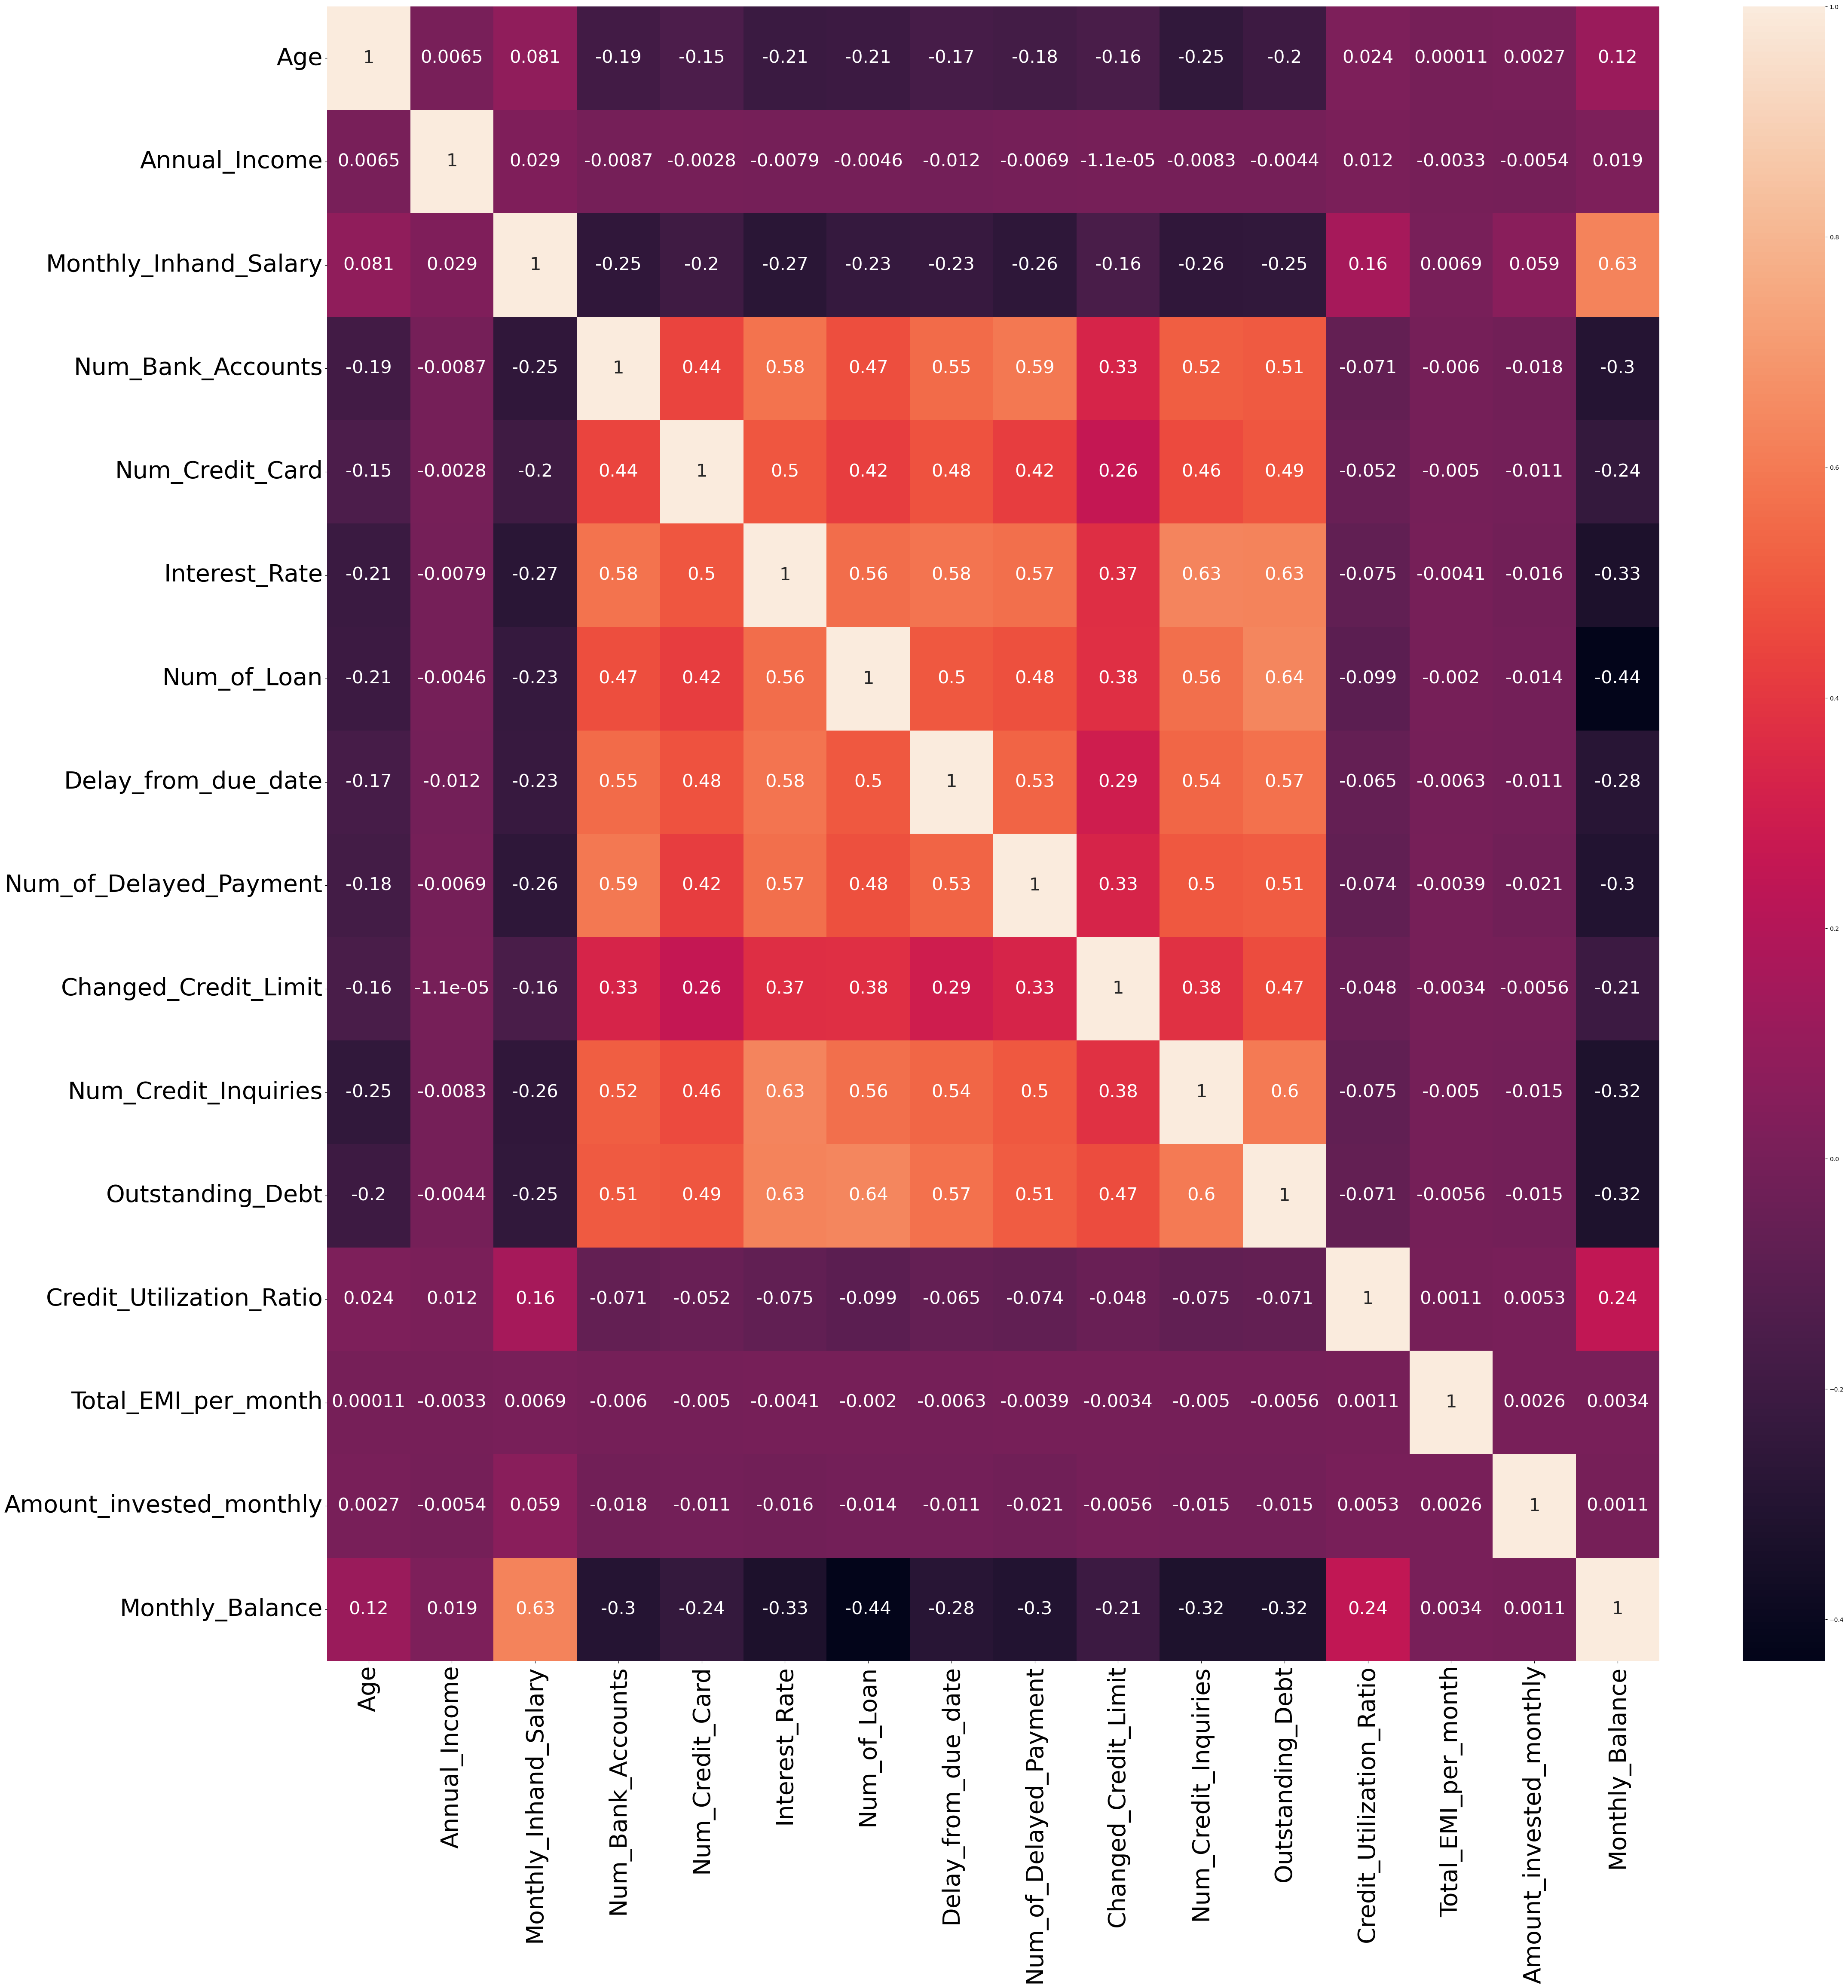

In [34]:
plt.figure(figsize=(50,50))
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

sns.heatmap(df_knn.corr(),annot=True,annot_kws={'size':30})


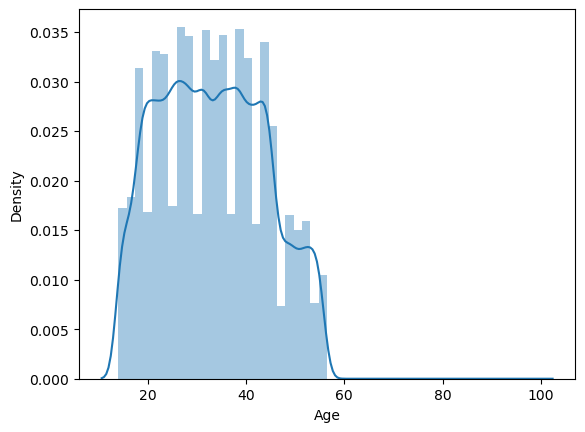

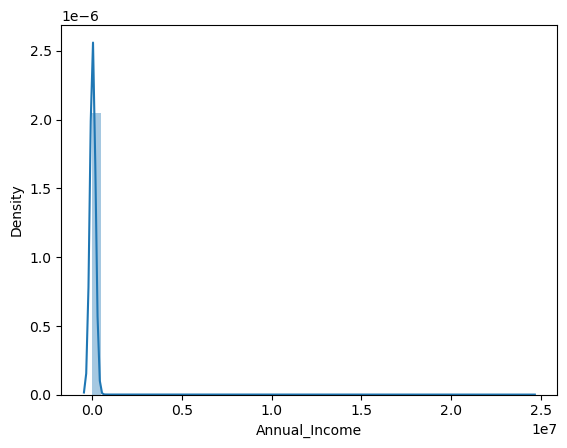

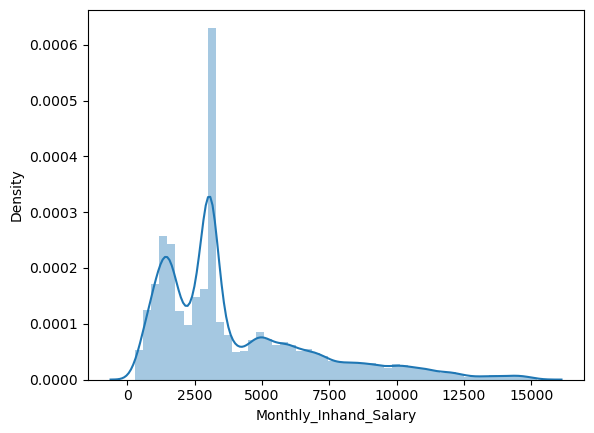

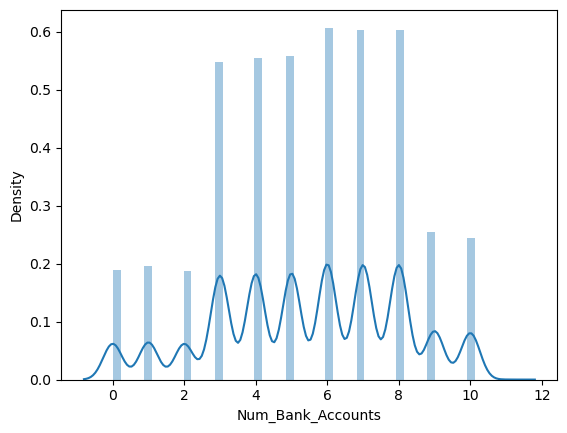

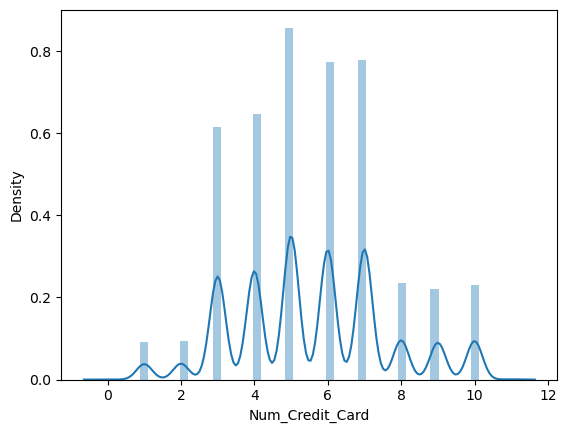

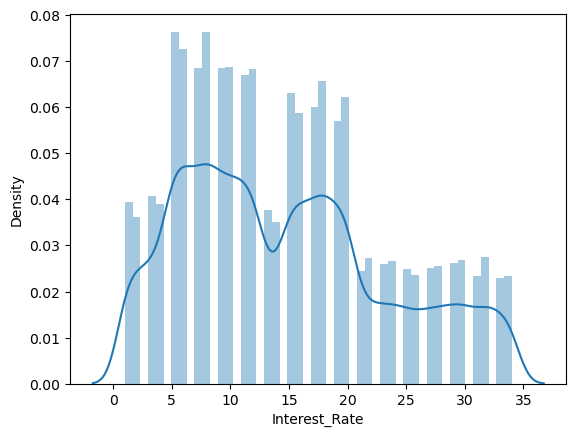

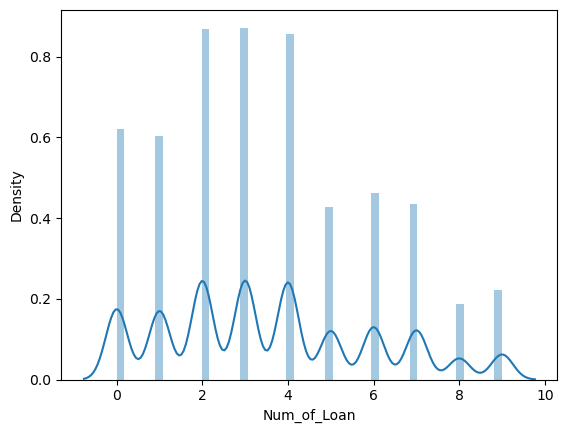

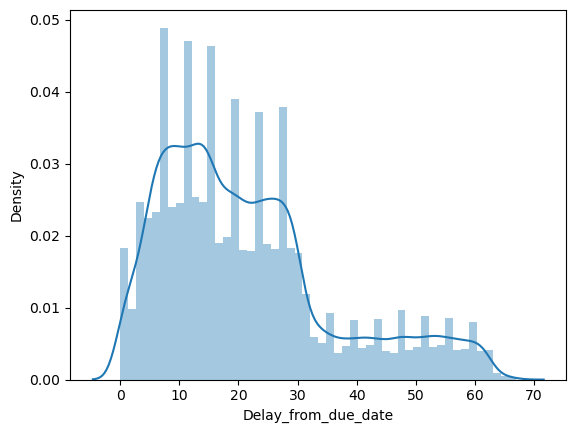

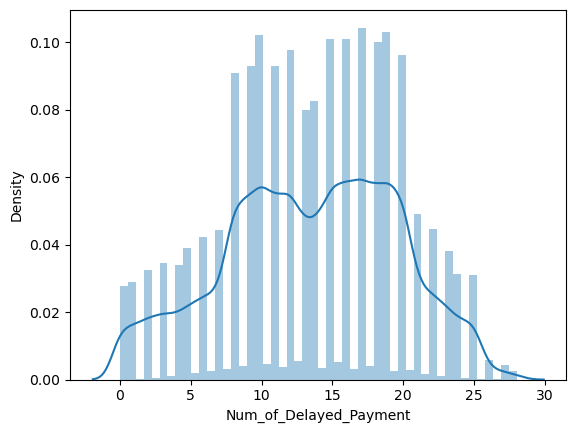

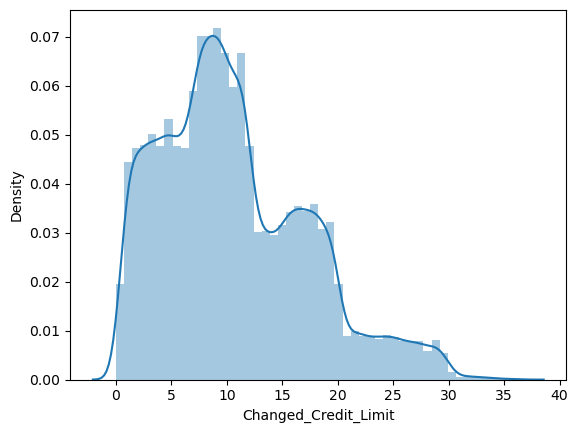

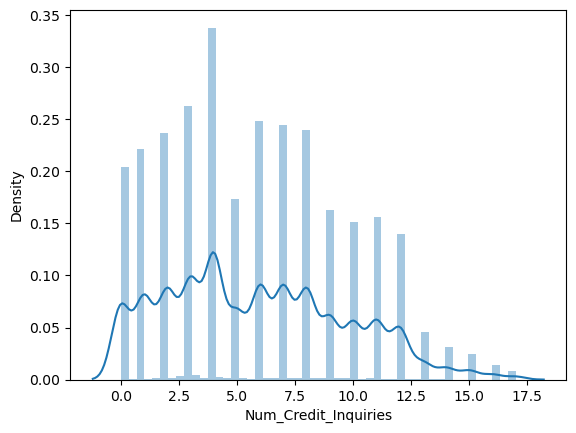

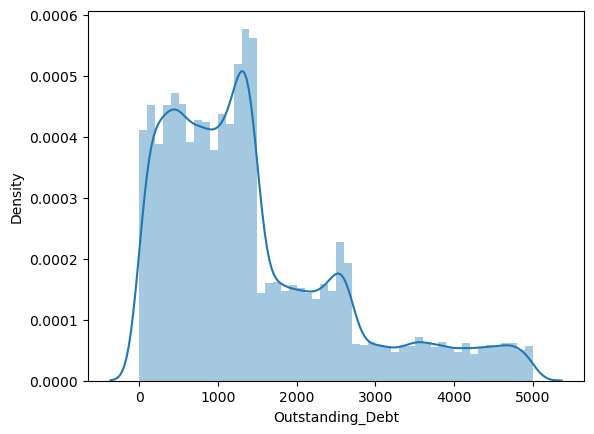

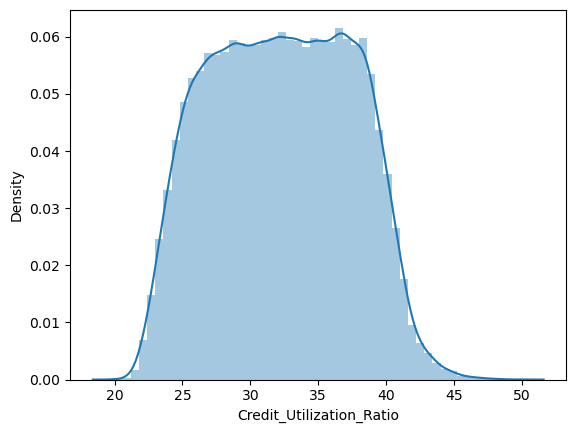

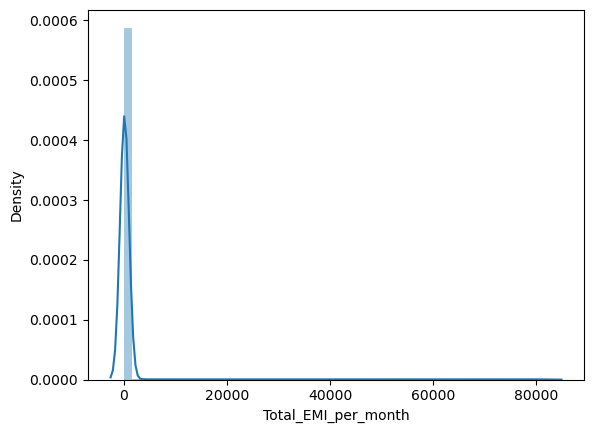

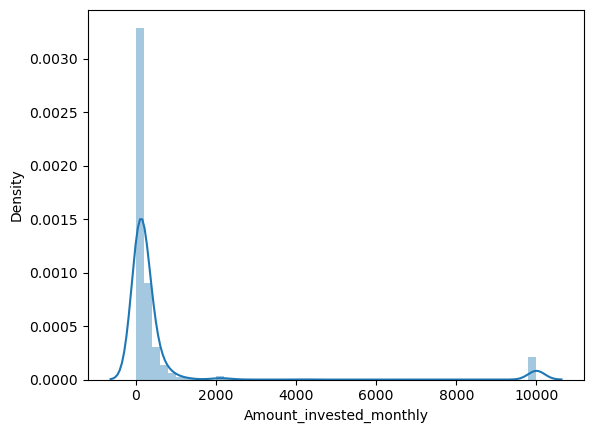

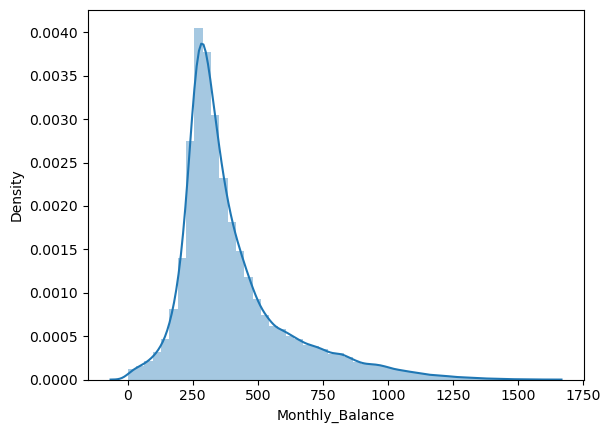

In [35]:
for i in df_knn.columns:
    sns.distplot(df_knn[i])
    plt.show()

## 5. Encoding Categorical Features  

In [36]:
df1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Scientist,Standard,No,HighspentSmallvaluepayments,Good
1,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Scientist,Good,No,LowspentSmallvaluepayments,Good
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.4,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Scientist,Good,No,HighspentMediumvaluepayments,Good
3,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212,Scientist,Good,No,LowspentSmallvaluepayments,Good
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,Scientist,Good,No,LowspentSmallvaluepayments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,435.278136,Mechanic,Standard,No,HighspentMediumvaluepayments,Poor
81567,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,440.941851,Mechanic,Standard,No,HighspentLargevaluepayments,Poor
81568,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,440.941851,Mechanic,Standard,No,HighspentMediumvaluepayments,Poor
81569,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,4.8,11.50,3.0,502.38,33.638208,35.104023,251.672582,306.164739,Mechanic,Good,No,LowspentLargevaluepayments,Standard


In [43]:
from sklearn.preprocessing import OneHotEncoder

#Initializing one-hot encoder.
encoder=OneHotEncoder(sparse=False,drop='first')

#Applying one-hot encoding to categorical columns.
oh_encoded=encoder.fit_transform(df1[['Occupation']])

encoded_df=pd.DataFrame(oh_encoded,columns=encoder.get_feature_names_out(['Occupation']))
df1=pd.concat([encoded_df,df1],axis=1)
df1.drop(columns='Occupation',axis=1,inplace=True)

In [44]:
df1

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Standard,No,HighspentSmallvaluepayments,Good
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good,No,LowspentSmallvaluepayments,Good
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.4,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good,No,HighspentMediumvaluepayments,Good
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212,Good,No,LowspentSmallvaluepayments,Good
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,Good,No,LowspentSmallvaluepayments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,435.278136,Standard,No,HighspentMediumvaluepayments,Poor
81567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,440.941851,Standard,No,HighspentLargevaluepayments,Poor
81568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,440.941851,Standard,No,HighspentMediumvaluepayments,Poor
81569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,4.8,11.50,3.0,502.38,33.638208,35.104023,251.672582,306.164739,Good,No,LowspentLargevaluepayments,Standard


In [45]:

columns_to_encode = ['Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

# Applying label encoding using pandas.factorize
for column in columns_to_encode:
    df1[column + '_encoded'] = pd.factorize(df1[column])[0]


In [46]:
df1.drop(columns=['Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour'],axis=1,inplace=True)

In [47]:
df1

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Payment_Behaviour_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Good,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good,1,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.4,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good,1,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,3077.808333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212,Good,1,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,Good,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,435.278136,Poor,0,0,2
81567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,440.941851,Poor,0,0,3
81568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,440.941851,Poor,0,0,2
81569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,4.8,11.50,3.0,502.38,33.638208,35.104023,251.672582,306.164739,Standard,1,0,5


## 6. Model

## 6.1 Logistic Regression

In [48]:
df2=df1[(df1["Credit_Score"]=='Good')|(df1["Credit_Score"]=='Poor')]
X1=df2.drop('Credit_Score',axis=1)
y1=df2['Credit_Score']

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [49]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X1_train, y1_train)

# Predicting the test set results
y1_pred = log_reg.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
f1=f1_score(y1_test, y1_pred,pos_label='Good')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7738
F1 Score: 0.6718


## 6.2 Decision Tree

In [50]:
X=df1.drop('Credit_Score',axis=1)
y=df1['Credit_Score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=100,random_state=42)
clf.fit(X_train,y_train)

# Predicting the test set results
y_pred=clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7106


## 6.3 Random Forest 

In [52]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7839
